In [ ]:
import numpy as np
import os
import csv
import cv2
import sys
import pandas as pd
from pandas import DataFrame
from PIL import Image
from matplotlib import pyplot as plt
import pprint

In [3]:
L = []
with open("E:/CUB_200_2011/CUB_200_2011/train_test_split.txt", "r") as f:
    for line in f.readlines():
        line = line.strip('\n')
        line = line.split(' ')
        L.append(int(line[-1]))
L = np.array(L)
idx1 = np.array(np.where(L == 1))
idx0 = np.array(np.where(L == 0))
print(idx1.shape)
print(idx0.shape)

(1, 5994)
(1, 5794)


training data 5994, test data 5794

In [ ]:
classes = open('E:/CUB_200_2011/CUB_200_2011/classes.txt')
c_names = classes.readlines()
len(c_names)

200

A total of 200 subclasses

In [ ]:
for i in range(len(c_names)):
    c_names[i] = c_names[i].split(' ')[1]

In [ ]:
c_names[0].split('\n')[0]

'001.Black_footed_Albatross'

output a category name

In [ ]:
with open("E:/CUB_200_2011/CUB_200_2011/parts/parts.txt", "r") as f:
    for line in f.readlines():
        line = line.strip('\n')
        print(line)

1 back
2 beak
3 belly
4 breast
5 crown
6 forehead
7 left eye
8 left leg
9 left wing
10 nape
11 right eye
12 right leg
13 right wing
14 tail
15 throat


Output the specific meaning of 15 parts

In [ ]:
import os
import csv
import pandas as pd
from PIL import Image

class CUB_ReadWrite:
    
    def __init__(self,cubPath):
        IMAGES_FILE   = "images.txt"
        BBOX_FILE     = "bounding_boxes.txt"
        IMGCLASS_FILE = "image_class_labels.txt"
        CLASSES_FILE  = "classes.txt"
        
        if (not (os.path.exists(cubPath))):
            raise ValueError("CUB data folder %s not found" % cubPath)
        else:
            self.cubPath = cubPath
            self.imgTxtPath = os.path.join(cubPath,IMAGES_FILE)
            self.bbTxtPath = os.path.join(cubPath,BBOX_FILE)
            self.imgClassPath = os.path.join(cubPath,IMGCLASS_FILE)
            self.classesPath = os.path.join(cubPath,CLASSES_FILE)
            if (not (os.path.exists(self.imgTxtPath)   and \
                     os.path.exists(self.bbTxtPath)    and \
                     os.path.exists(self.imgClassPath) and \
                     os.path.exists(self.classesPath)  and \
                     os.path.exists(os.path.join(cubPath,'images')))):
                raise ValueError("a CUB data file not found ({} ,{} ,{}, {}, {})".format(\
                               self.imgTxtPath, self.bbTxtPath, self.imgClassPath, \
                               self.classesPath, 'images folder' ))
            else: 
                self.imgList,self.imgDict,self.imgSizesDict = self._readImgTxt()
                self.bboxDict = self._readBB()
                self.imgClassDict = self._readImgClass()
                self.classesDict = self._readClasses()
        
    def _getImgSize(self,imgPath):
        im = Image.open(imgPath)
        return im.size

    def _readImgTxt(self):
        imgList = []
        imgDict = {}
        imgSizesDict = {}
        with open(self.imgTxtPath) as f:
            spamreader = csv.reader(f, delimiter=' ')
            for row in spamreader:
                imgList.append(int(row[0]))
                imgPath = os.path.join(self.cubPath+'images',row[1])
                width,height = self._getImgSize(imgPath)
                imgDict[int(row[0])] = imgPath
                imgSizesDict[int(row[0])] = [width,height]
        return imgList,imgDict,imgSizesDict

    def _readBB(self):
        bboxDict = {}
        with open(self.bbTxtPath) as f:
            spamreader = csv.reader(f, delimiter=' ')
            for row in spamreader:
                bboxDict[int(row[0])] = [ int(float(x)) for x in row[1:5] ]
        return bboxDict

    def _readImgClass(self):
        imgClassDict = {}
        with open(self.imgClassPath) as f:
            spamreader = csv.reader(f, delimiter=' ')
            for row in spamreader:
                imgClassDict[int(row[0])] = int(row[1])  #offset by 0 
        return imgClassDict

    def _readClasses(self):
        classDict = {}
        with open(self.classesPath) as f:
            spamreader = csv.reader(f, delimiter=' ')
            for row in spamreader:
                classDict[int(row[0])] = row[1]
        return classDict
    
    def getImages(self):
        return self.imgDict
   
    def getImagesSizes(self):
        return self.imgSizesDict
    
    def getBoxes(self):
        return self.bboxDict
    
    def getImgClasses(self):
        return self.imgClassDict
    
    def getClasses(self):
        return self.classesDict
    
    def getCubSize(self):
        return len(self.imgList) , len(self.classesDict)    
    
    def writeCubToCsv(self,csvFilePath):
        with open(csvFilePath, 'w') as csvfile:
            fieldnames = ['filename', 'width', 'height', 'class', 'xmin', 'ymin', 'xmax', 'ymax', 'centerx', 'centery', 'b-width', 'b-height' ]
            #writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
            #writer.writeheader()
            cubList = []
            for k in self.imgList:
                i = k -1  # reindexing
                #imgPath = os.path.join(self.cubPath, self.imgDict[self.imgList[i]])
                imgPath  = self.imgDict[self.imgList[i]]
                imWidth  = self.imgSizesDict[self.imgList[i]][0]
                imHeight = self.imgSizesDict[self.imgList[i]][1] 
                imgClass = self.classesDict[self.imgClassDict[self.imgList[i]]]
                boxWidth = int(self.bboxDict[self.imgList[i]][2])
                boxHeight = int(self.bboxDict[self.imgList[i]][3])
                xmin = int(self.bboxDict[self.imgList[i]][0])
                ymin = int(self.bboxDict[self.imgList[i]][1])
                xmax = int(self.bboxDict[self.imgList[i]][0] + boxWidth)
                ymax = int(self.bboxDict[self.imgList[i]][1] + boxHeight)
                centerx = int(self.bboxDict[self.imgList[i]][0] + boxWidth / 2)
                centery = int(self.bboxDict[self.imgList[i]][1] + boxHeight / 2)
                row = (imgPath,
                    imWidth,
                    imHeight,
                    imgClass,
                    xmin,
                    ymin,
                    xmax,
                    ymax,
                    centerx,
                    centery,
                    boxWidth,
                    boxHeight)
                cubList.append(row)
        cubDf = pd.DataFrame(cubList, columns=fieldnames)
        cubDf.to_csv(csvFilePath, index=None)
        return cubDf

In [ ]:
CUB_PATH = "E:/CUB_200_2011/CUB_200_2011/"
CSV_PATH = "cub_csv.csv"
PROCESS_CUB = True 

In [ ]:
class CUB_ReadWrite(CUB_ReadWrite):
    def path(self):
        return self.cubPath
        
def getCsv(csvPath):
    csvData =  pd.read_csv(csvPath)
    return csvData

def head(d, top):
    return dict(list(d.items())[0:top-1])

def draw_box(csvRow):
    img = cv2.imread(csvRow['filename'])
    img = cv2.rectangle(img, (csvRow['xmin'], csvRow['ymin']), (csvRow['xmax'], csvRow['ymax']), (0, 0, 0), 1)
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(img,csvRow['class'],(csvRow['xmin'],csvRow['ymin']), font, 0.5,(255,255,255),1)
    cv2.putText(img,str(csvRow['width'])+"x"+str(csvRow['height']),(0,csvRow['height']), font, 0.4,(255,255,255),1)
    cv2.putText(img,str(csvRow['b-width'])+"x"+str(csvRow['b-height']),(csvRow['xmin'],csvRow['ymax']), font, 0.3,(255,255,255),1)
    return img

def showCsvImages(csvRows):
    for idx in range(len(csvRows.index)):
        row = csvRows.iloc[idx]
        pilImage = Image.fromarray(cv2.cvtColor(draw_box(row),cv2.COLOR_BGR2RGB))
        display(pilImage)

In [ ]:
if (PROCESS_CUB):   # enables reloading the notebook wothout reading the data (csv read mode only)
    try:
        cub = CUB_ReadWrite(CUB_PATH)         # initialize class object cub
    except ValueError as e:
        print("error in class constructor: ",e)
        sys.exit()
    
    # this part is class methods demo (prints the class methods returned data) 
    # ---------------------------------------------------------------------------------------------------
    print("CUB path:")
    pprint.pprint(CUB_PATH)
    print("CUB data sizes (images,classes):")
    print(cub.getCubSize())                      # CUB records (int)
    print("CUB imagefiles (top 10):")
    pprint.pprint(head(cub.getImages(),10))      # images path (dict - {id : path})
    print("CUB images sizes (top 10):")
    pprint.pprint(head(cub.getImagesSizes(),10)) # images sizes (dict - {id : [width,height]})
    print("CUB images classes ids (top 10):")
    pprint.pprint(head(cub.getImgClasses(),10))  # images class id (dict - {id : class id} )
    print("CUB image bounding boxes (top 10):")
    pprint.pprint(head(cub.getBoxes(),10))       # images boxes(dict - {id : [xmin, ymin, width, height]})
    print("CUB classes names (top 10):")
    pprint.pprint(head(cub.getClasses(),10))     # CUB class names (dict - {id : class name})
    # --------------------------------------------------------------------------------------------------
    
    cubDf = cub.writeCubToCsv(CSV_PATH)           # write CUB data to the csv file and the data as pandas dataframe
    pd.set_option('display.max_rows', 10)         # display the to 10 from the dataframe (for demo only)
    print (cubDf)
    del(cub)                                      # delete cub object

CUB path:
'E:/CUB_200_2011/CUB_200_2011/'
CUB data sizes (images,classes):
(11788, 200)
CUB imagefiles (top 10):
{1: 'E:/CUB_200_2011/CUB_200_2011/images\\001.Black_footed_Albatross/Black_Footed_Albatross_0046_18.jpg',
 2: 'E:/CUB_200_2011/CUB_200_2011/images\\001.Black_footed_Albatross/Black_Footed_Albatross_0009_34.jpg',
 3: 'E:/CUB_200_2011/CUB_200_2011/images\\001.Black_footed_Albatross/Black_Footed_Albatross_0002_55.jpg',
 4: 'E:/CUB_200_2011/CUB_200_2011/images\\001.Black_footed_Albatross/Black_Footed_Albatross_0074_59.jpg',
 5: 'E:/CUB_200_2011/CUB_200_2011/images\\001.Black_footed_Albatross/Black_Footed_Albatross_0014_89.jpg',
 6: 'E:/CUB_200_2011/CUB_200_2011/images\\001.Black_footed_Albatross/Black_Footed_Albatross_0085_92.jpg',
 7: 'E:/CUB_200_2011/CUB_200_2011/images\\001.Black_footed_Albatross/Black_Footed_Albatross_0031_100.jpg',
 8: 'E:/CUB_200_2011/CUB_200_2011/images\\001.Black_footed_Albatross/Black_Footed_Albatross_0051_796103.jpg',
 9: 'E:/CUB_200_2011/CUB_200_2011/

Some key information was output

In [ ]:
csvData = getCsv(CSV_PATH)
csvData.head(10)  

,filename,width,height,class,xmin,ymin,xmax,ymax,centerx,centery,b-width,b-height
0,E:/CUB_200_2011/CUB_200_2011/images\001.Black_...,500,335,001.Black_footed_Albatross,60,27,385,331,222,179,325,304
1,E:/CUB_200_2011/CUB_200_2011/images\001.Black_...,500,336,001.Black_footed_Albatross,139,30,292,294,215,162,153,264
2,E:/CUB_200_2011/CUB_200_2011/images\001.Black_...,500,347,001.Black_footed_Albatross,14,112,402,298,208,205,388,186
3,E:/CUB_200_2011/CUB_200_2011/images\001.Black_...,415,500,001.Black_footed_Albatross,112,90,367,332,239,211,255,242
4,E:/CUB_200_2011/CUB_200_2011/images\001.Black_...,331,380,001.Black_footed_Albatross,70,50,204,353,137,201,134,303
5,E:/CUB_200_2011/CUB_200_2011/images\001.Black_...,500,470,001.Black_footed_Albatross,33,53,284,448,158,250,251,395
6,E:/CUB_200_2011/CUB_200_2011/images\001.Black_...,500,340,001.Black_footed_Albatross,7,75,427,337,217,206,420,262
7,E:/CUB_200_2011/CUB_200_2011/images\001.Black_...,500,391,001.Black_footed_Albatross,78,86,411,244,244,165,333,158
8,E:/CUB_200_2011/CUB_200_2011/images\001.Black_...,500,416,001.Black_footed_Albatross,112,76,333,265,222,170,221,189
9,E:/CUB_200_2011/CUB_200_2011/images\001.Black_...,250,208,001.Black_footed_Albatross,27,4,226,205,126,104,199,201


Generate statistical files of image information

Found 5 records:


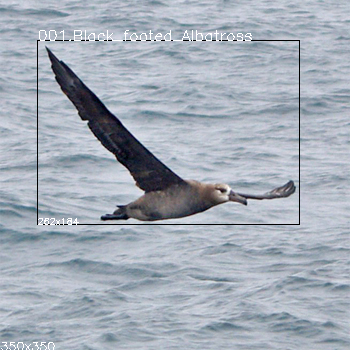

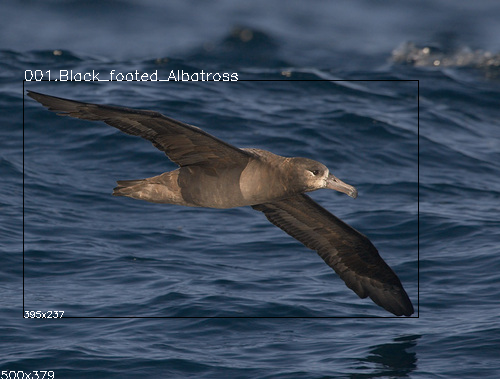

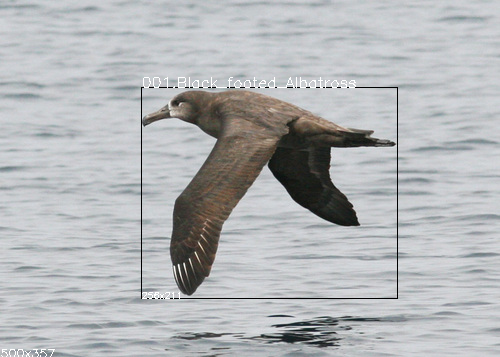

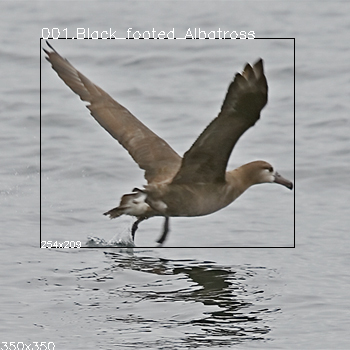

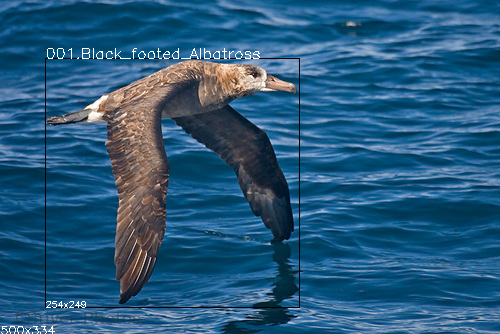

In [ ]:
csvRows = csvData.iloc[13:18]
found = len(csvRows.index)
if (found > 0):
    print ("Found {} records:".format(found)) 
    showCsvImages(csvRows)
else:
    print ("No records found")

Shows the effect of bounding boxes. The bird and the background are artificially defined. Can play a role in assisting learning.